In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from os.path import expanduser
import tensorflow as tf
from tensorflow.keras import layers


import cv2

In [2]:
path = expanduser('~/data/bird_class/')
data_folders = ['valid', 'train', 'test']
dat = os.listdir(path) 
dat
#rename folder PARAKETT  AKULET to PARAKEET AUKLET in os because it is misspelled
for data_split in data_folders:
    for folder in os.listdir(os.path.join(path,data_split)):
        if 'PARAKETT AUKLET' in folder:
            os.rename(os.path.join(path,data_split,folder), os.path.join(path,data_split,folder.replace('PARAKETT AUKLET', 'PARAKEET AUKLET')))

In [3]:
bird_df = pd.read_csv(path + 'birds.csv')
#replace PARAKETT  AKULET with PARAKETT AUKLET in filepaths and labels
bird_df['filepaths'] = bird_df['filepaths'].str.replace('PARAKETT  AKULET', 'PARAKEET AUKLET')
bird_df['labels'] = bird_df['labels'].str.replace('PARAKETT  AKULET', 'PARAKEET AUKLET')
bird_df

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


In [4]:
#Labels to classes 
labels_dct = {}

print(len(bird_df['class id'].unique()), len(bird_df['labels'].str.lower().unique()), len(bird_df['scientific name'].str.lower().unique()))
#The lengths of the scientific names differ from the labels, so we need to find the missing scientific names

for index, val in enumerate(bird_df['class id'].unique()):
    labels_dct[index] = bird_df['labels'].str.lower().unique()[index]
labels_dct[0]

525 525 522


'abbotts babbler'

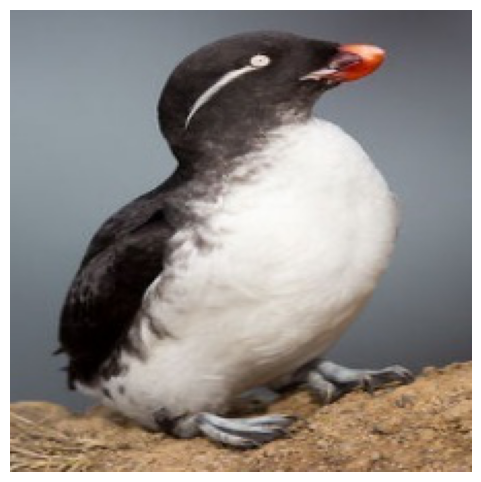

In [ ]:
def read_images_array(filepath):
    lst = cv2.imread(os.path.join(path+filepath), 1)
    return lst
img = read_images_array('/valid/PARAKEET AUKLET/1.jpg')

#converting from BGR to RGB because matplotlib reads in RGB and CV2 reads in BGR

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
ax.axis('off')
plt.show()

In [ ]:
#Manually splitting the data and saving it to a dictionary for pickling
def split_data(df):
    set_dct = {}
    file_paths = df.pop('filepaths')
    df.drop(['scientific name','labels'], axis=1, inplace=True)
    df['class id'] = df['class id'].astype(int)
    df['image'] = file_paths.apply(read_images_array)

    for item in df['data set'].unique():
        set_dct[item] = df[df['data set'] == item]
    return set_dct
data = split_data(bird_df)

#writing the file to a pickle file
with open(path+'bird.pickle', "wb") as pkl:
    pickle.dump(data, pkl, pickle.HIGHEST_PROTOCOL)

In [5]:
#Manually reading the saved pickle file
#reading the pickle file
with open(path+'bird.pickle', "rb") as pkl:
    data = pickle.load(pkl)
    
train_df = data['train']
valid_df = data['valid']
testing_df = data['test']
#drop the data set column
train_df.drop('data set', axis=1, inplace=True)
valid_df.drop('data set', axis=1, inplace=True)
testing_df.drop('data set', axis=1, inplace=True)

#merge train and valid dataframes
training_df = pd.concat([train_df, valid_df], ignore_index=True)
training_df.head()

In [25]:
#Automatically reading the data and putting it into a generator
training_data = tf.keras.utils.image_dataset_from_directory(path+'train/')
validation_data = tf.keras.utils.image_dataset_from_directory(path+'valid/')
testing_data = tf.keras.utils.image_dataset_from_directory(path+'test/')

train_iterator = training_data.as_numpy_iterator()
valid_iterator = validation_data.as_numpy_iterator()
test_iterator = testing_data.as_numpy_iterator()

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [26]:
batch = next(train_iterator)
batch

(array([[[[ 97.       , 103.       , 103.       ],
          [100.25     , 106.25     , 106.25     ],
          [105.8125   , 110.4375   , 112.5      ],
          ...,
          [134.4375   , 138.4375   , 137.4375   ],
          [130.4375   , 134.4375   , 133.4375   ],
          [128.       , 132.       , 131.       ]],
 
         [[101.0625   , 107.0625   , 107.0625   ],
          [ 99.69141  , 105.69141  , 105.69141  ],
          [101.953125 , 106.578125 , 108.640625 ],
          ...,
          [136.875    , 140.875    , 139.875    ],
          [132.875    , 136.875    , 135.875    ],
          [130.4375   , 134.4375   , 133.4375   ]],
 
         [[104.0625   , 110.0625   , 110.0625   ],
          [101.06641  , 107.06641  , 107.06641  ],
          [101.01953  , 105.64453  , 107.70703  ],
          ...,
          [140.40234  , 144.40234  , 143.40234  ],
          [136.875    , 140.875    , 139.875    ],
          [134.4375   , 138.4375   , 137.4375   ]],
 
         ...,
 
         [[1